In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [2]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [3]:
GLA = gpd.read_file("https://data.london.gov.uk/download/gla-high-street-boundaries/166e8e42-c1ea-42ec-bd1d-99dc29d04fa8/GLA_High_Street_boundaries.gpkg")

<AxesSubplot:>

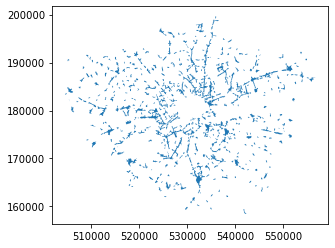

In [4]:
GLA.plot()

In [5]:
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )

print('Done.')

Found data/geo/Boroughs.gpkg locally!
Done.


In [6]:
print(boros.crs)

epsg:27700


In [7]:
boros

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
5,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
6,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
7,Harrow,E09000015,5046.330,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510660...."
8,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
9,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."


In [8]:
Camden = boros[boros["NAME"]=="Camden"]

<AxesSubplot:>

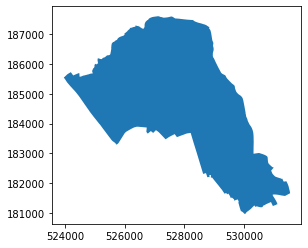

In [9]:
Camden.plot()

In [10]:
CamHS = gpd.clip(GLA, Camden)

***

### Extracting the geographies of each Camden HS

In [11]:
CamHS

,objectid,highstreet_id,highstreet_name,area_ha,gdb_geomattr_data,geometry
97,97,97,Brecknock Road & York Way.,15.327961,None,"POLYGON ((529626.963 185290.470, 529619.385 18..."
98,98,98,Kentish Town Road.,11.453950,None,"POLYGON ((529169.048 184315.559, 529169.180 18..."
291,285,285,"Fortress Road, Tufnell Park.",28.325719,None,"POLYGON ((529209.157 185757.682, 529206.506 18..."
293,287,287,Camden Town HS,56.349258,None,"POLYGON ((528129.528 184489.100, 528138.350 18..."
310,303,303,"Belsize Lane, Belsize Park.",5.069615,None,"POLYGON ((526892.645 185059.806, 526900.890 18..."
311,304,304,"Loudoun Road, South Hampstead.",8.078871,None,"POLYGON ((526350.252 184351.109, 526360.006 18..."
313,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,"POLYGON ((527238.261 185262.468, 527237.189 18..."
314,307,307,"South End Road, Hampstead.",6.131431,None,"POLYGON ((527231.814 185728.745, 527232.663 18..."
326,319,319,"Highgate High Street, Highgate.",8.723256,None,"POLYGON ((528678.473 187328.037, 528676.686 18..."
329,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,"POLYGON ((524019.997 185605.672, 524022.679 18..."


In [12]:
names = list(CamHS['highstreet_name'])

In [13]:
names

['Brecknock Road & York Way.',
 'Kentish Town Road.',
 'Fortress Road, Tufnell Park.',
 'Camden Town HS',
 'Belsize Lane, Belsize Park.',
 'Loudoun Road, South Hampstead.',
 'Haverstock Hill, Belsize Park.',
 'South End Road, Hampstead.',
 'Highgate High Street, Highgate.',
 'Cricklewood Broadway, Cricklewood.',
 'Regent’s Park Road.',
 'Queen’s Crescent, Gospel Oak.',
 'Kilburn High Road, Kilburn.',
 'Mill Lane, West Hampstead.',
 'Fortune Green Road, Fortune Green.',
 'Willesden Lane, Brondesbury.',
 'Finchley Road, Childs Hill',
 'Mansfield Road, Gospel Oak',
 'West End Lane, West Hampstead.',
 'Hampstead High Street, Hampstead.',
 'Eversholt Street, Somers Town']

In [11]:
Brecknock = CamHS.iloc[[0]]

In [16]:
Brecknock.to_file("Brecknock.shp")

In [19]:
Kentish = CamHS.iloc[[1]]

In [18]:
Kentish.to_file("Kentish.shp")

In [20]:
Fortress = CamHS.iloc[[2]]

In [20]:
Fortress.to_file("High Street Boundaries/Fortress.shp")

In [21]:
CamdenT = CamHS.iloc[[3]]

In [23]:
CamdenT.to_file("High Street Boundaries/CamdenT.shp")

In [22]:
Belsize = CamHS.iloc[[4]]

In [25]:
Belsize.to_file("High Street Boundaries/Belsize.shp")

In [23]:
Loudoun = CamHS.iloc[[5]]

In [27]:
Loudoun.to_file("High Street Boundaries/Loudoun.shp")

In [24]:
Haverstock = CamHS.iloc[[6]]

In [29]:
Haverstock.to_file("High Street Boundaries/Haverstock.shp")

In [25]:
SouthEnd = CamHS.iloc[[7]]

In [32]:
SouthEnd.to_file("High Street Boundaries/SouthEnd.shp")

In [26]:
Highgate = CamHS.iloc[[8]]

In [34]:
Highgate.to_file("High Street Boundaries/Highgate.shp")

In [27]:
Cricklewood = CamHS.iloc[[9]]

In [37]:
Cricklewood.to_file("High Street Boundaries/Cricklewood.shp")

In [28]:
Regents = CamHS.iloc[[10]]

In [39]:
Regents.to_file("High Street Boundaries/Regents.shp")

In [29]:
Queens = CamHS.iloc[[11]]

In [42]:
Queens.to_file("High Street Boundaries/Queens.shp")

In [30]:
Kilburn = CamHS.iloc[[12]]

In [44]:
Kilburn.to_file("High Street Boundaries/Kilburn.shp")

In [31]:
Mill = CamHS.iloc[[13]]

In [46]:
Mill.to_file("High Street Boundaries/Mill.shp")

In [32]:
Fortune = CamHS.iloc[[14]]

In [48]:
Fortune.to_file("High Street Boundaries/Fortune.shp")

In [33]:
Willesden = CamHS.iloc[[15]]

In [50]:
Willesden.to_file("High Street Boundaries/Willesden.shp")

In [34]:
Finchley = CamHS.iloc[[16]]

In [53]:
Finchley.to_file("High Street Boundaries/Finchley.shp")

In [35]:
Mansfield = CamHS.iloc[[17]]

In [55]:
Mansfield.to_file("High Street Boundaries/Mansfield.shp")

In [36]:
WestEnd = CamHS.iloc[[18]]

In [57]:
WestEnd.to_file("High Street Boundaries/WestEnd.shp")

In [37]:
Hampstead = CamHS.iloc[[19]]

In [59]:
Hampstead.to_file("High Street Boundaries/Hampstead.shp")

In [38]:
Eversholt = CamHS.iloc[[20]]

In [61]:
Eversholt.to_file("High Street Boundaries/Eversholt.shp")

***

### Clipping ABPWHY to the GLA highstreets

In [12]:
ABPWHY = pd.read_csv("ABPWHY-final.csv")

/opt/conda/envs/sds2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (30,44,45,47,51,53,57,59,65,77,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
CAMDEN = gpd.GeoDataFrame(ABPWHY, geometry = gpd.points_from_xy(ABPWHY['V11'], ABPWHY['V10'], crs="epsg:4326"))

In [14]:
del ABPWHY

In [15]:
CAMDEN = CAMDEN.to_crs("EPSG:27700")

In [16]:
camHSpoints = gpd.clip(CAMDEN, CamHS)

In [17]:
Brecknock1 = gpd.clip(camHSpoints, Brecknock)

In [184]:
Brecknock1.to_csv("Brecknock-points.csv")

In [18]:
Brecknock1.to_file('High Street Points (WHYTHAWK)/Brecknock.shp')

<AxesSubplot:>

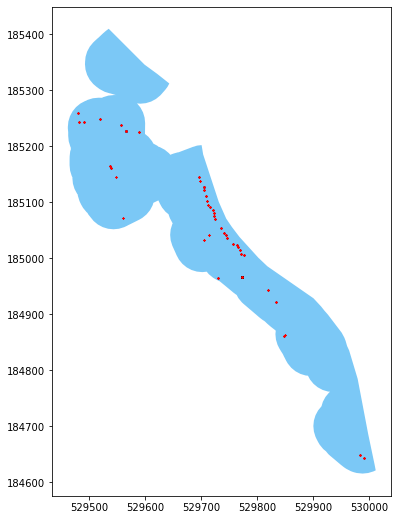

In [59]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Brecknock.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Brecknock1.plot(color= "red", markersize=0.2, ax=ax)

In [39]:
Kentish1 = gpd.clip(camHSpoints, Kentish)

In [186]:
Kentish1.to_csv("Kentish-points.csv")

In [40]:
Kentish1.to_file('High Street Points (WHYTHAWK)/Kentish.shp')

<AxesSubplot:>

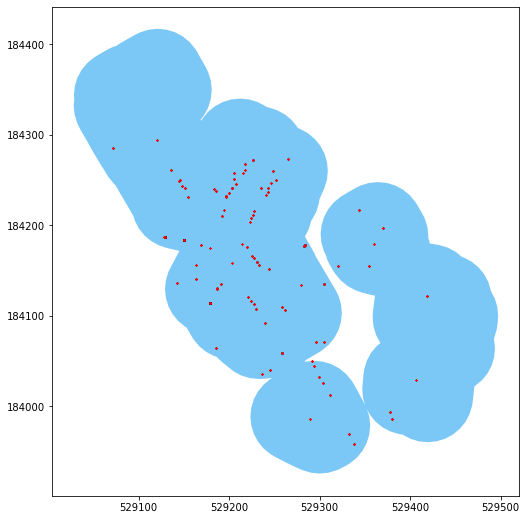

In [61]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Kentish.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Kentish1.plot(color= "red", markersize=0.2, ax=ax)

In [41]:
Fortress1 = gpd.clip(camHSpoints, Fortress)

In [188]:
Fortress1.to_csv("Fortress-points.csv")

In [42]:
Fortress1.to_file('High Street Points (WHYTHAWK)/Fortress.shp')

<AxesSubplot:>

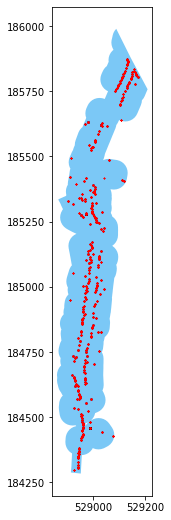

In [64]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Fortress.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Fortress1.plot(color= "red", markersize=0.2, ax=ax)

In [43]:
CamdenT1 = gpd.clip(camHSpoints, CamdenT)

In [190]:
CamdenT1.to_csv("CamdenT-points.csv")

In [44]:
CamdenT1.to_file('High Street Points (WHYTHAWK)/CamdenT.shp')

<AxesSubplot:>

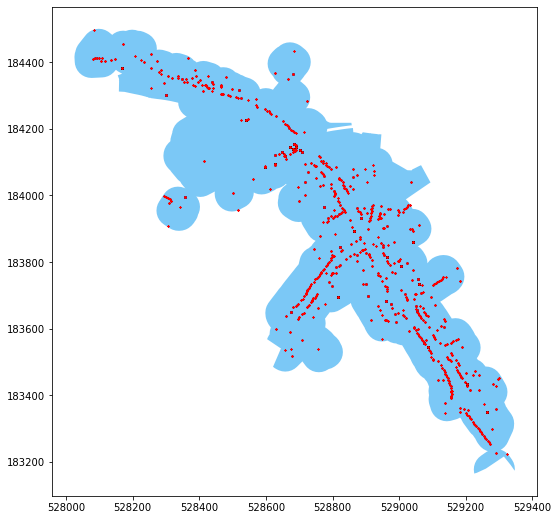

In [66]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamdenT.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
CamdenT1.plot(color= "red", markersize=0.2, ax=ax)

In [45]:
Belsize1 = gpd.clip(camHSpoints, Belsize)

In [192]:
Belsize1.to_csv("Belsize-points.csv")

In [46]:
Belsize1.to_file('High Street Points (WHYTHAWK)/Belsize.shp')

<AxesSubplot:>

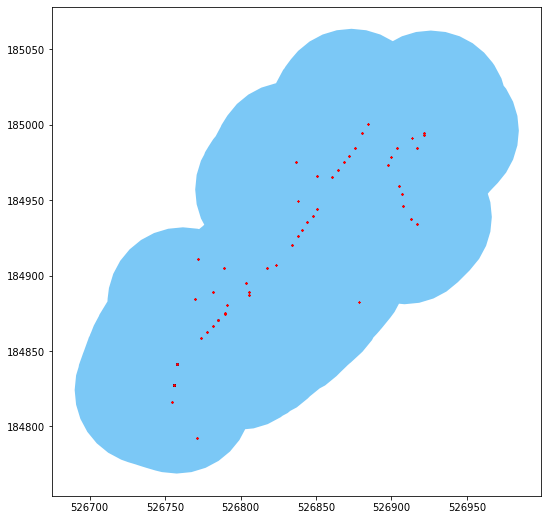

In [68]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Belsize.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Belsize1.plot(color= "red", markersize=0.2, ax=ax)

In [47]:
Loudoun1 = gpd.clip(camHSpoints, Loudoun)

In [194]:
Loudoun1.to_csv("Loudoun-points.csv")

In [48]:
Loudoun1.to_file('High Street Points (WHYTHAWK)/Loudoun.shp')

<AxesSubplot:>

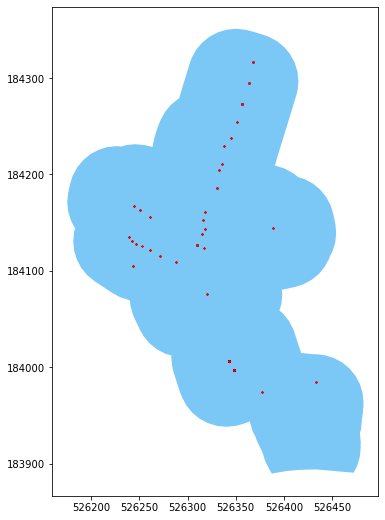

In [70]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Loudoun.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Loudoun1.plot(color= "red", markersize=0.2, ax=ax)

In [49]:
Haverstock1 = gpd.clip(camHSpoints, Haverstock)

In [196]:
Haverstock1.to_csv("Haverstock-points.csv")

In [50]:
Haverstock1.to_file('High Street Points (WHYTHAWK)/Haverstock.shp')

<AxesSubplot:>

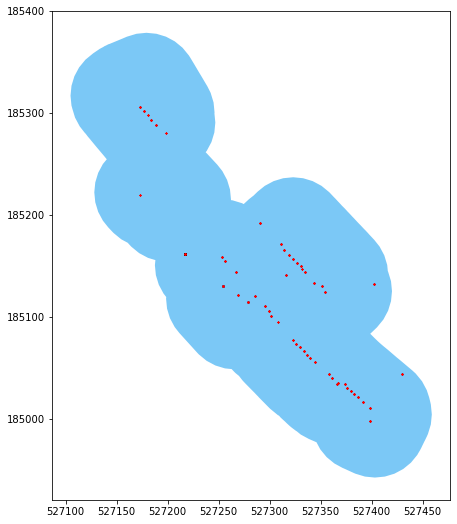

In [73]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Haverstock.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Haverstock1.plot(color= "red", markersize=0.2, ax=ax)

In [51]:
SouthEnd1 = gpd.clip(camHSpoints, SouthEnd)

In [198]:
SouthEnd1.to_csv("SouthEnd-points.csv")

In [52]:
SouthEnd1.to_file('High Street Points (WHYTHAWK)/SouthEnd.shp')

<AxesSubplot:>

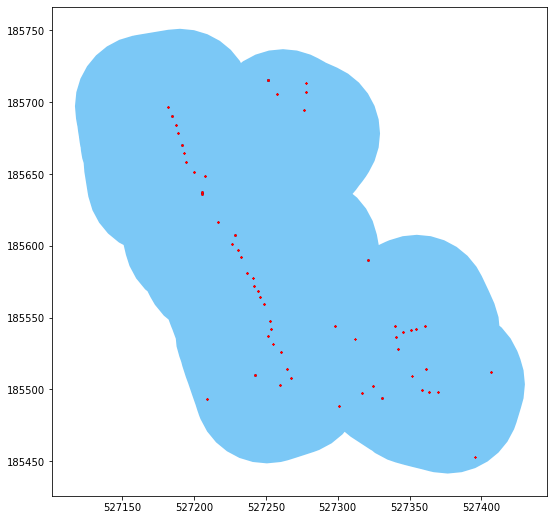

In [75]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

SouthEnd.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
SouthEnd1.plot(color= "red", markersize=0.2, ax=ax)

In [53]:
Highgate1 = gpd.clip(camHSpoints, Highgate)

In [200]:
Highgate1.to_csv("Highgate-points.csv")

In [54]:
Highgate1.to_file('High Street Points (WHYTHAWK)/Highgate.shp')

<AxesSubplot:>

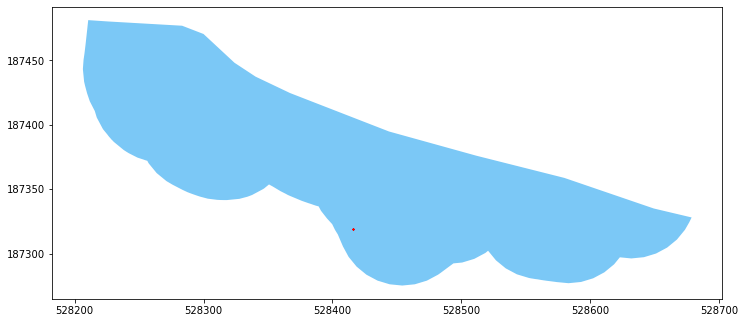

In [77]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Highgate.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Highgate1.plot(color= "red", markersize=0.2, ax=ax)

In [55]:
Cricklewood1 = gpd.clip(camHSpoints, Cricklewood)

In [202]:
Cricklewood1.to_csv("Cricklewood-points.csv")

In [56]:
Cricklewood1.to_file('High Street Points (WHYTHAWK)/Cricklewood1.shp')

<AxesSubplot:>

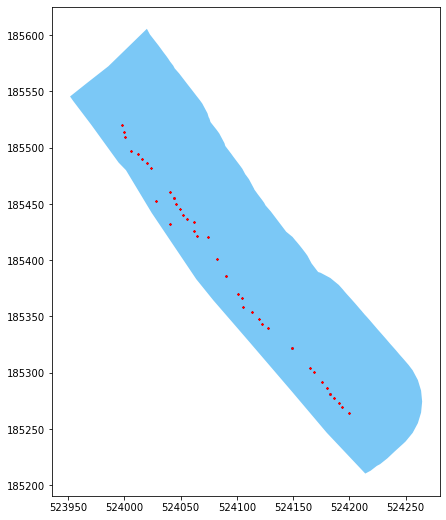

In [79]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Cricklewood.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Cricklewood1.plot(color= "red", markersize=0.2, ax=ax)

In [57]:
Regents1 = gpd.clip(camHSpoints, Regents)

In [204]:
Regents1.to_csv("Regents-points.csv")

In [58]:
Regents1.to_file('High Street Points (WHYTHAWK)/Regents.shp')

<AxesSubplot:>

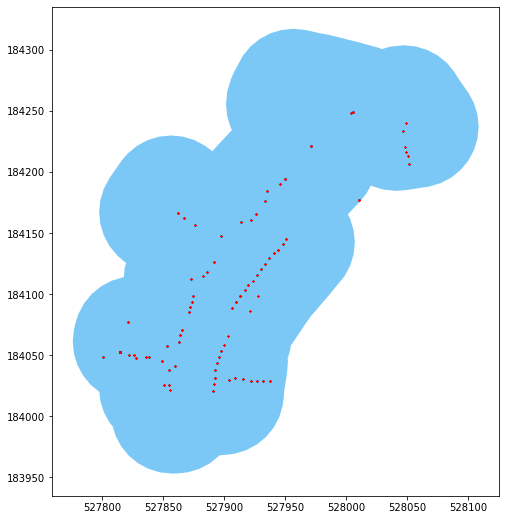

In [81]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Regents.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Regents1.plot(color= "red", markersize=0.2, ax=ax)

In [59]:
Queens1 = gpd.clip(camHSpoints, Queens)

In [206]:
Queens1.to_csv("Queens-points.csv")

In [60]:
Queens1.to_file('High Street Points (WHYTHAWK)/Queens.shp')

<AxesSubplot:>

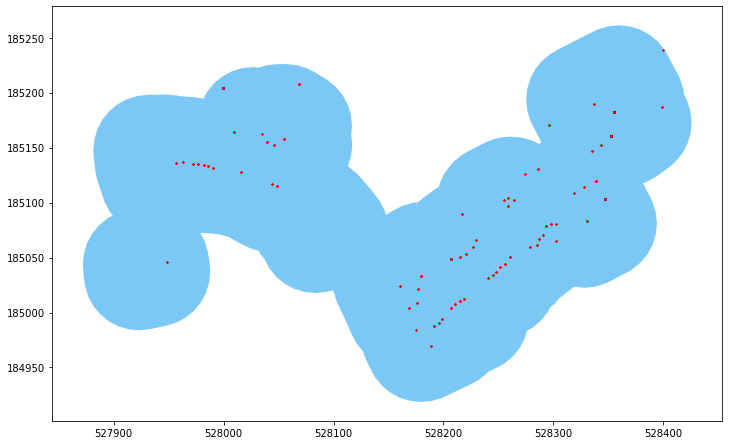

In [83]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Queens.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Queens1.plot(color= "red", markersize=0.2, ax=ax)

In [61]:
Kilburn1 = gpd.clip(camHSpoints, Kilburn)

In [208]:
Kilburn1.to_csv("Kilburn-points.csv")

In [62]:
Kilburn1.to_file('High Street Points (WHYTHAWK)/Kilburn.shp')

<AxesSubplot:>

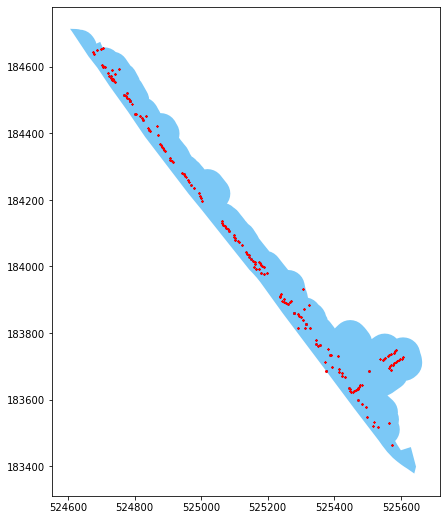

In [85]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Kilburn.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Kilburn1.plot(color= "red", markersize=0.2, ax=ax)

In [63]:
Mill1 = gpd.clip(camHSpoints, Mill)

In [210]:
Mill1.to_csv("Mill-points.csv")

In [64]:
Mill1.to_file('High Street Points (WHYTHAWK)/Mill.shp')

<AxesSubplot:>

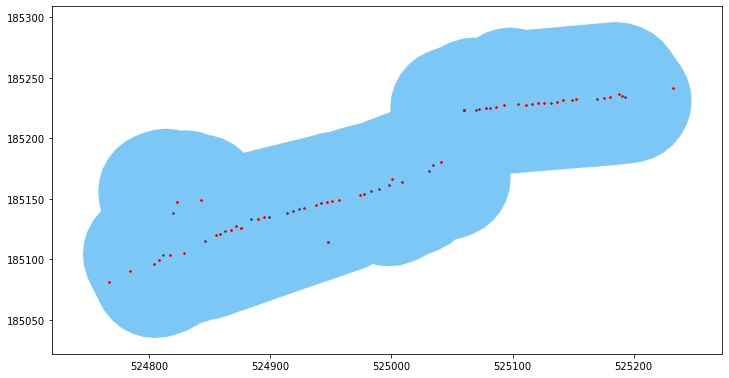

In [87]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Mill.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Mill1.plot(color= "red", markersize=0.2, ax=ax)

In [65]:
Fortune1 = gpd.clip(camHSpoints, Fortune)

In [42]:
Fortune1.to_csv("Fortune-points.csv")

In [66]:
Fortune1.to_file('High Street Points (WHYTHAWK)/Fortune.shp')

<AxesSubplot:>

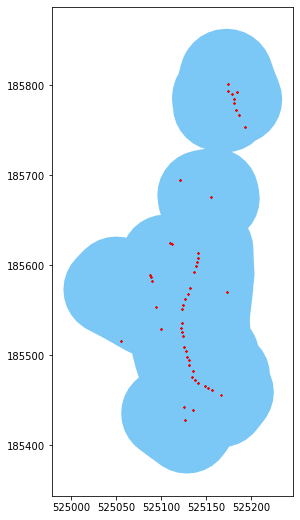

In [88]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Fortune.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Fortune1.plot(color= "red", markersize=0.2, ax=ax)

In [67]:
Willesden1 = gpd.clip(camHSpoints, Willesden)

In [44]:
Willesden1.to_csv("Willesden-points.csv")

In [68]:
Willesden1.to_file('High Street Points (WHYTHAWK)/Willesden.shp')

<AxesSubplot:>

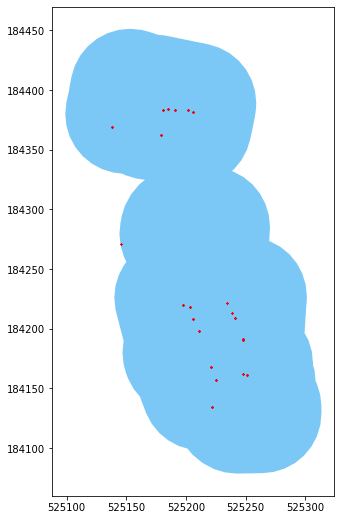

In [89]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Willesden.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Willesden1.plot(color= "red", markersize=0.2, ax=ax)

In [69]:
Finchley1 = gpd.clip(camHSpoints, Finchley)

In [46]:
Finchley1.to_csv("Finchley-points.csv")

In [70]:
Finchley1.to_file('High Street Points (WHYTHAWK)/Finchley.shp')

ValueError: Cannot write empty DataFrame to file.

/opt/conda/envs/sds2020/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<AxesSubplot:>

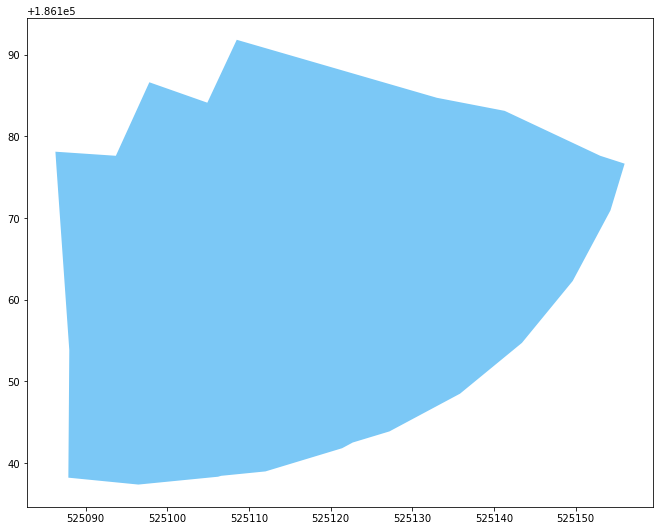

In [92]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Finchley.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Finchley1.plot(color= "red", markersize=0.2, ax=ax)

In [74]:
Mansfield1 = gpd.clip(camHSpoints, Mansfield)

In [48]:
Mansfield1.to_csv("Mansfield-points.csv")

In [75]:
Mansfield1.to_file('High Street Points (WHYTHAWK)/Mansfield.shp')

<AxesSubplot:>

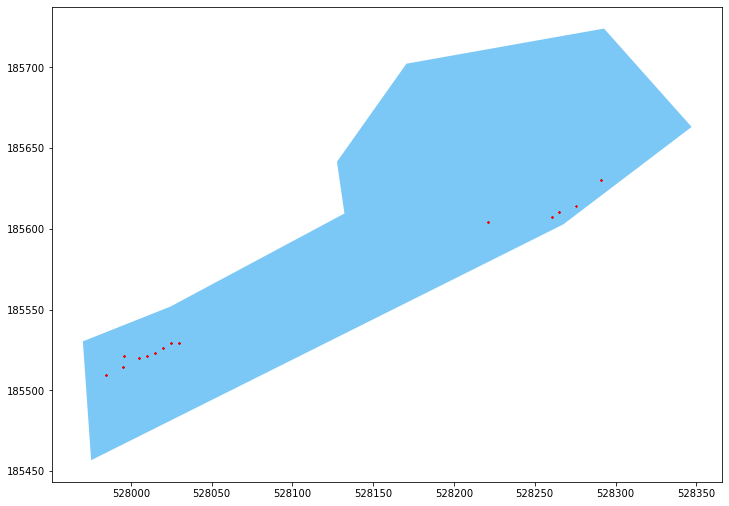

In [93]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Mansfield.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Mansfield1.plot(color= "red", markersize=0.2, ax=ax)

In [76]:
WestEnd1 = gpd.clip(camHSpoints, WestEnd)

In [50]:
WestEnd1.to_csv("WestEnd-points.csv")

In [77]:
WestEnd1.to_file('High Street Points (WHYTHAWK)/WestEnd.shp')

<AxesSubplot:>

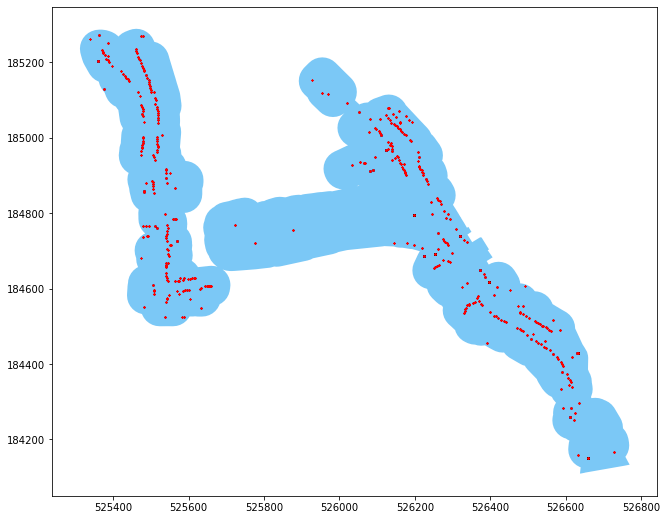

In [94]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

WestEnd.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
WestEnd1.plot(color= "red", markersize=0.2, ax=ax)

In [78]:
Hampstead1 = gpd.clip(camHSpoints, Hampstead)

In [52]:
Hampstead1.to_csv("Hampstead-points.csv")

In [79]:
Hampstead1.to_file('High Street Points (WHYTHAWK)/Hampstead.shp')

<AxesSubplot:>

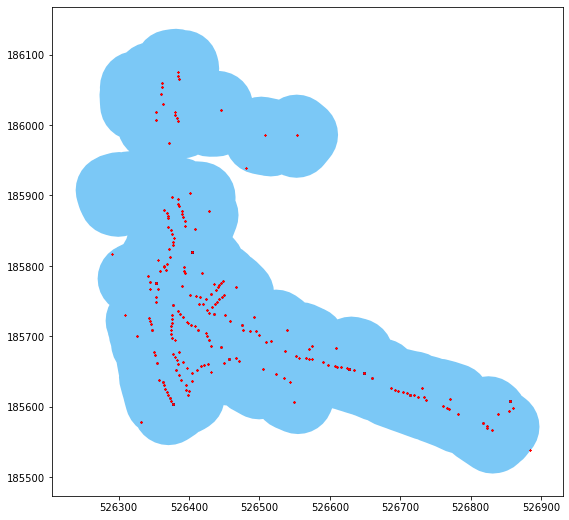

In [96]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Hampstead.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Hampstead1.plot(color= "red", markersize=0.2, ax=ax)

In [71]:
Eversholt1 = gpd.clip(camHSpoints, Eversholt)

In [54]:
Eversholt1.to_csv("Eversholt-points.csv")

In [72]:
Eversholt1.to_file('High Street Points (WHYTHAWK)/Eversholt.shp')

<AxesSubplot:>

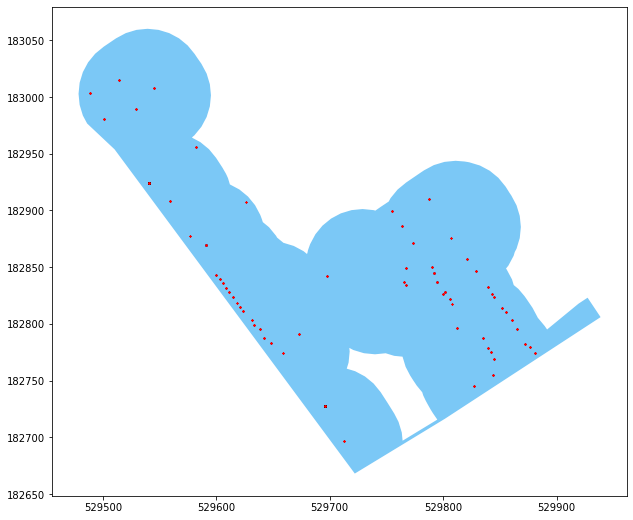

In [56]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Eversholt.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
Eversholt1.plot(color= "red", markersize=0.2, ax=ax)

***

### Checking Highgate High Street Datapoints

<AxesSubplot:>

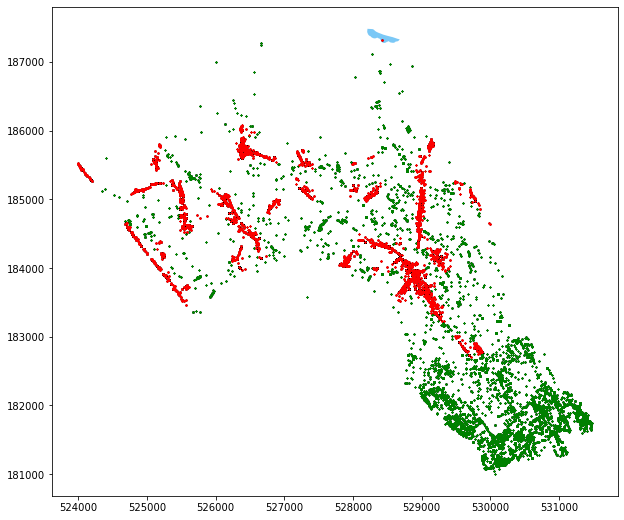

In [73]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Highgate.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
CAMDEN.plot(color= "green", markersize=0.2, ax=ax)
camHSpoints.plot(color= "red", markersize=0.2, ax=ax)

Given that it is on the border of Camden Borough, clearly the lack of data provided by Camden Local Authority suggests that they do not feel responsible for this area

Should be similar for:

- Brecknock Road and York Way 
- Cricklewood Broadway
- Kilburn High Street
- Finchley Road

##### HOWEVER NOTE: 
* Finchley Road = no Whythwark datapoint 
* Kilburn - Surprisingly v populated
* Cricklewood - well populated
* Breckrock - somewhat populated however there are 'chunky' areas which are sparse

We can therefore ignore both Highgate and Finchley Road - we are left with 19 High Streets to consider